In [40]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

cctv = pd.read_csv('서울시 자치구 CCTV 설치현황.csv', encoding='utf-8')
cctv.head()

,순번,구분,총 계,2015년 이전,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,1,종로구,2031,549,158,128,143,142,67,237,82,225,300
1,2,중 구,2718,275,236,239,372,386,155,364,419,137,135
2,3,용산구,3258,88,38,295,491,147,335,473,486,500,405
3,4,성동구,4409,190,352,278,939,457,640,483,366,233,471
4,5,광진구,3828,309,95,42,666,460,712,191,740,273,340


In [41]:
# 순번 날리기
cctv = cctv.drop(columns=['순번', '총 계'])
cctv.head()

,구분,2015년 이전,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,종로구,549,158,128,143,142,67,237,82,225,300
1,중 구,275,236,239,372,386,155,364,419,137,135
2,용산구,88,38,295,491,147,335,473,486,500,405
3,성동구,190,352,278,939,457,640,483,366,233,471
4,광진구,309,95,42,666,460,712,191,740,273,340


In [42]:
cctv.rename({'구분':'자치구', '2015년 이전':'2014년'}, axis=1, inplace=True)
cctv.columns

Index(['자치구', '2014년', '2015년', '2016년', '2017년', '2018년', '2019년', '2020년',
       '2021년', '2022년', '2023년'],
      dtype='object')

In [43]:
import re
# '년' 부분 제거
# x : 열 이름
# r'.*(\d{4}).*' : 열 이름에서 4자리 숫자를 찾는다.
# r'\1' : 첫 번째 그룹
cctv.rename(lambda x : re.sub(r'.*(\d{4}).*', r'\1', x), axis=1, inplace=True)
cctv.columns

Index(['자치구', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023'],
      dtype='object')

In [44]:
pd.unique(cctv.자치구)

array(['종로구', '중 구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [45]:
len(pd.unique(cctv.자치구))

25

In [46]:
# 자치구를 인덱스로
cctv.set_index('자치구', inplace=True)
cctv.head()

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
자치구,,,,,,,,,,
종로구,549,158,128,143,142,67,237,82,225,300
중 구,275,236,239,372,386,155,364,419,137,135
용산구,88,38,295,491,147,335,473,486,500,405
성동구,190,352,278,939,457,640,483,366,233,471
광진구,309,95,42,666,460,712,191,740,273,340


In [47]:
cctv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 종로구 to 강동구
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2014    25 non-null     int64
 1   2015    25 non-null     int64
 2   2016    25 non-null     int64
 3   2017    25 non-null     int64
 4   2018    25 non-null     int64
 5   2019    25 non-null     int64
 6   2020    25 non-null     int64
 7   2021    25 non-null     int64
 8   2022    25 non-null     int64
 9   2023    25 non-null     int64
dtypes: int64(10)
memory usage: 2.1+ KB


In [48]:
columns_with_null = cctv.columns[cctv.isnull().any()].tolist()
columns_with_null

[]

In [49]:
cctv.describe()

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.00000,25.000000,25.000000,25.00000
mean,350.360000,229.000000,341.480000,430.80000,424.760000,514.200000,461.00000,374.320000,375.160000,479.52000
std,312.870298,183.563568,264.877506,275.39865,210.991366,317.603526,255.16155,183.155153,196.099184,227.79324
min,0.000000,0.000000,42.000000,4.00000,142.000000,65.000000,156.00000,28.000000,124.000000,10.00000
25%,111.000000,109.000000,167.000000,227.00000,246.000000,312.000000,298.00000,226.000000,233.000000,353.00000
50%,281.000000,183.000000,277.000000,372.00000,386.000000,366.000000,404.00000,366.000000,341.000000,446.00000
75%,534.000000,294.000000,446.000000,566.00000,539.000000,781.000000,514.00000,507.000000,481.000000,629.00000
max,1126.000000,814.000000,1280.000000,1022.00000,850.000000,1074.000000,1214.00000,740.000000,878.000000,1010.00000


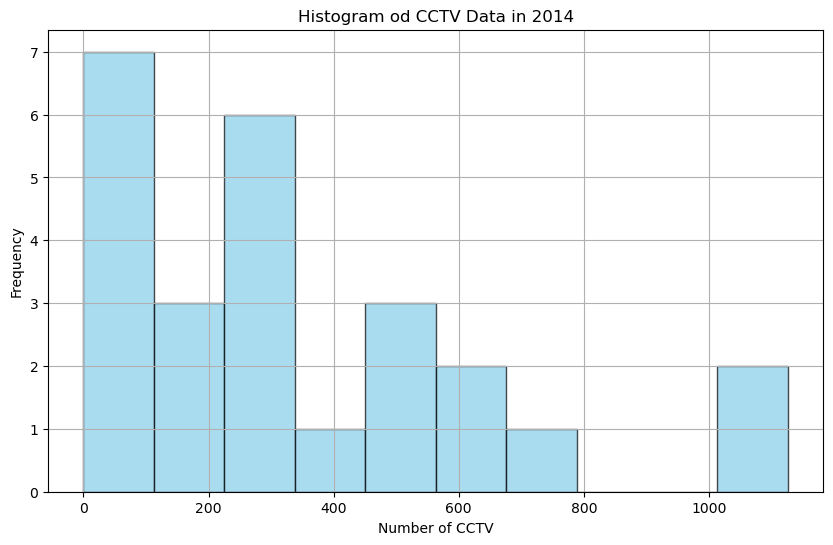

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(cctv['2014'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram od CCTV Data in 2014')
plt.xlabel('Number of CCTV')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

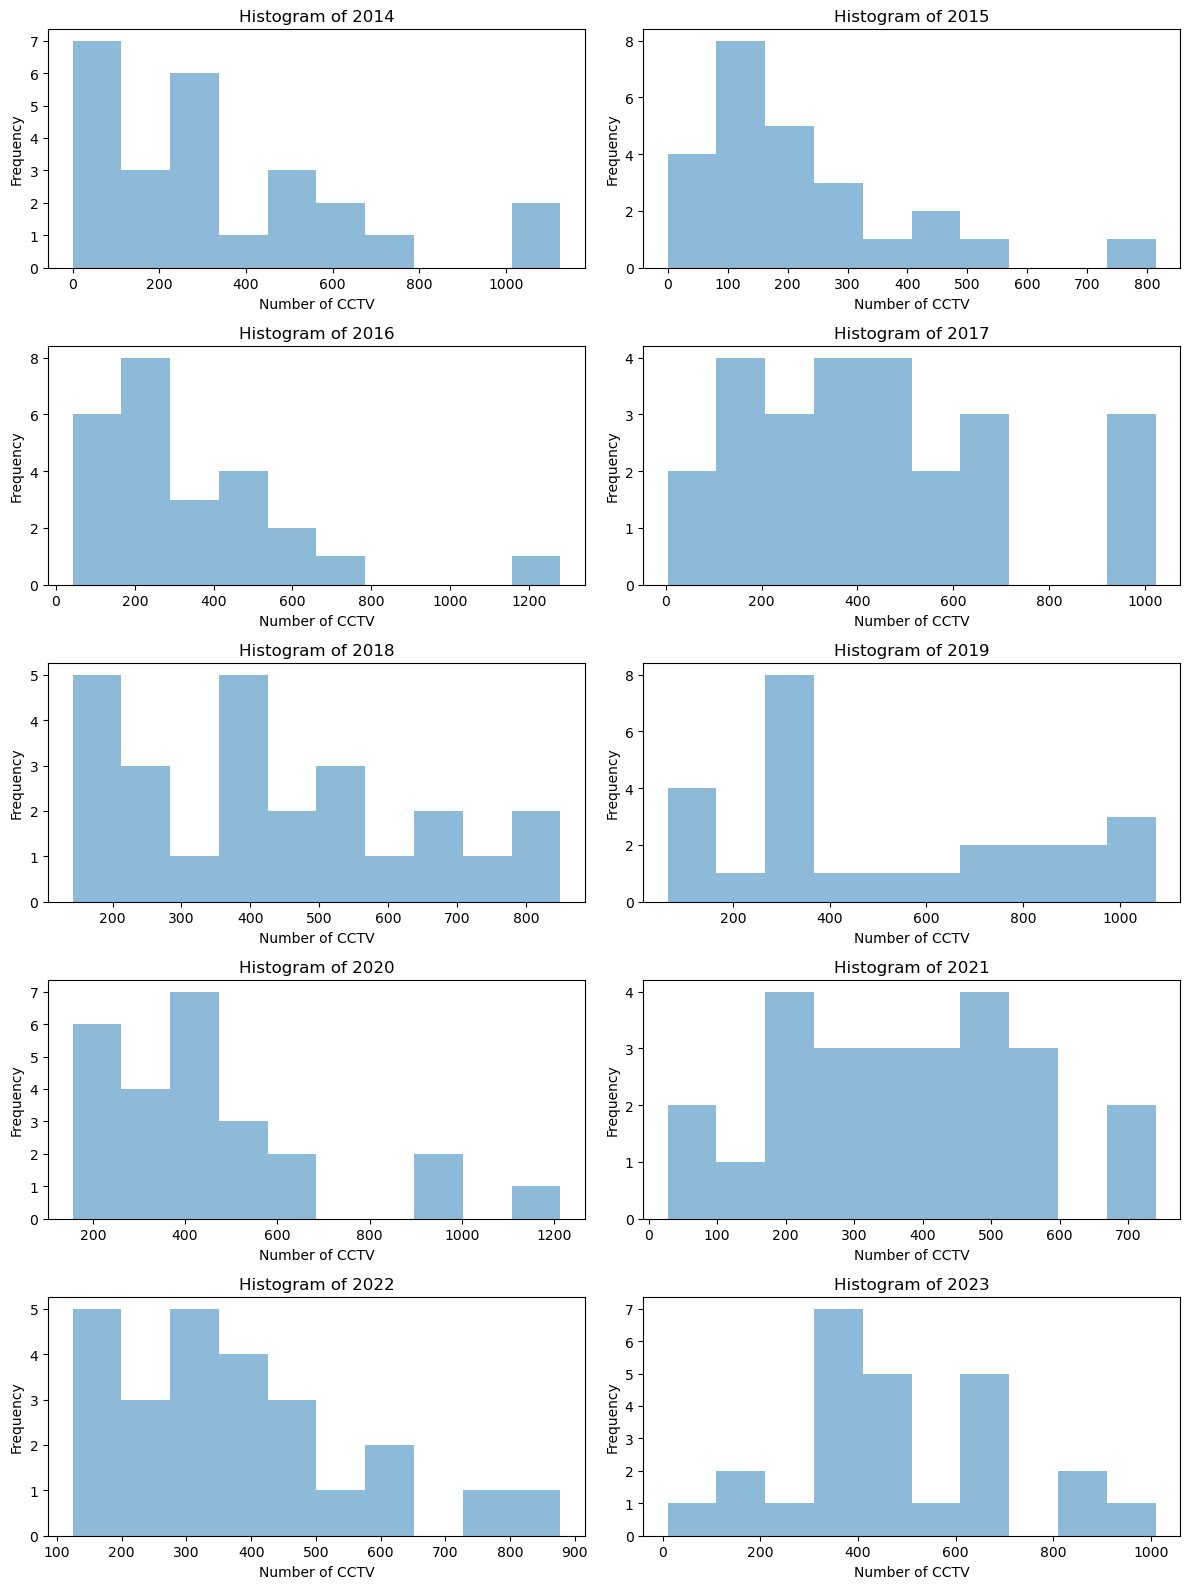

In [67]:
# 히스토그램을 통한 데이터 분포와 중심 경향 파악
# 2014 - 2023년까지 전체 히스토그램 출력
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 16))
axes = axes.flatten()

for i, year in enumerate(cctv.columns):
    axes[i].hist(cctv[year], alpha=0.5)
    axes[i].set_title(f'Histogram of {year}')
    axes[i].set_xlabel('Number of CCTV')
    axes[i].set_ylabel('Frequency')

plt.tight_layout() # 서브플롯끼리 간격을 적절하게 조절한다.
plt.show()

-> 분포 형태 파악 : 히스토그램 모양을 통해 데이터의 분포 형태를 파악할 수 있다.

-> 중심 경향성 파악 : 데이터가 평균값을 중심으로 분포되어 있는지 파악한다.

-> 이상치 감지 : 히스토그램을 통해 분포에서 극단적으로 벗어난 값이 있는지 파악한다.

-> 데이터 밀도 파악 : 막대의 높이를 통해 각 구간에 속한 데이터의 밀도를 파악한다.

# Boxplot

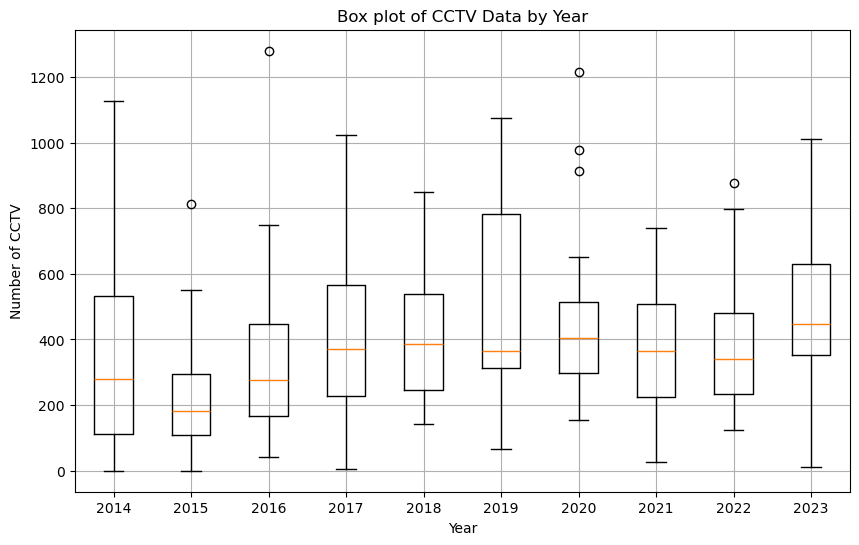

In [69]:
plt.figure(figsize=(10, 6))
plt.boxplot(cctv.values, labels=cctv.columns)
plt.title('Box plot of CCTV Data by Year')
plt.xlabel('Year')
plt.ylabel('Number of CCTV')
plt.grid(True)
plt.show()

# 산점도 행렬

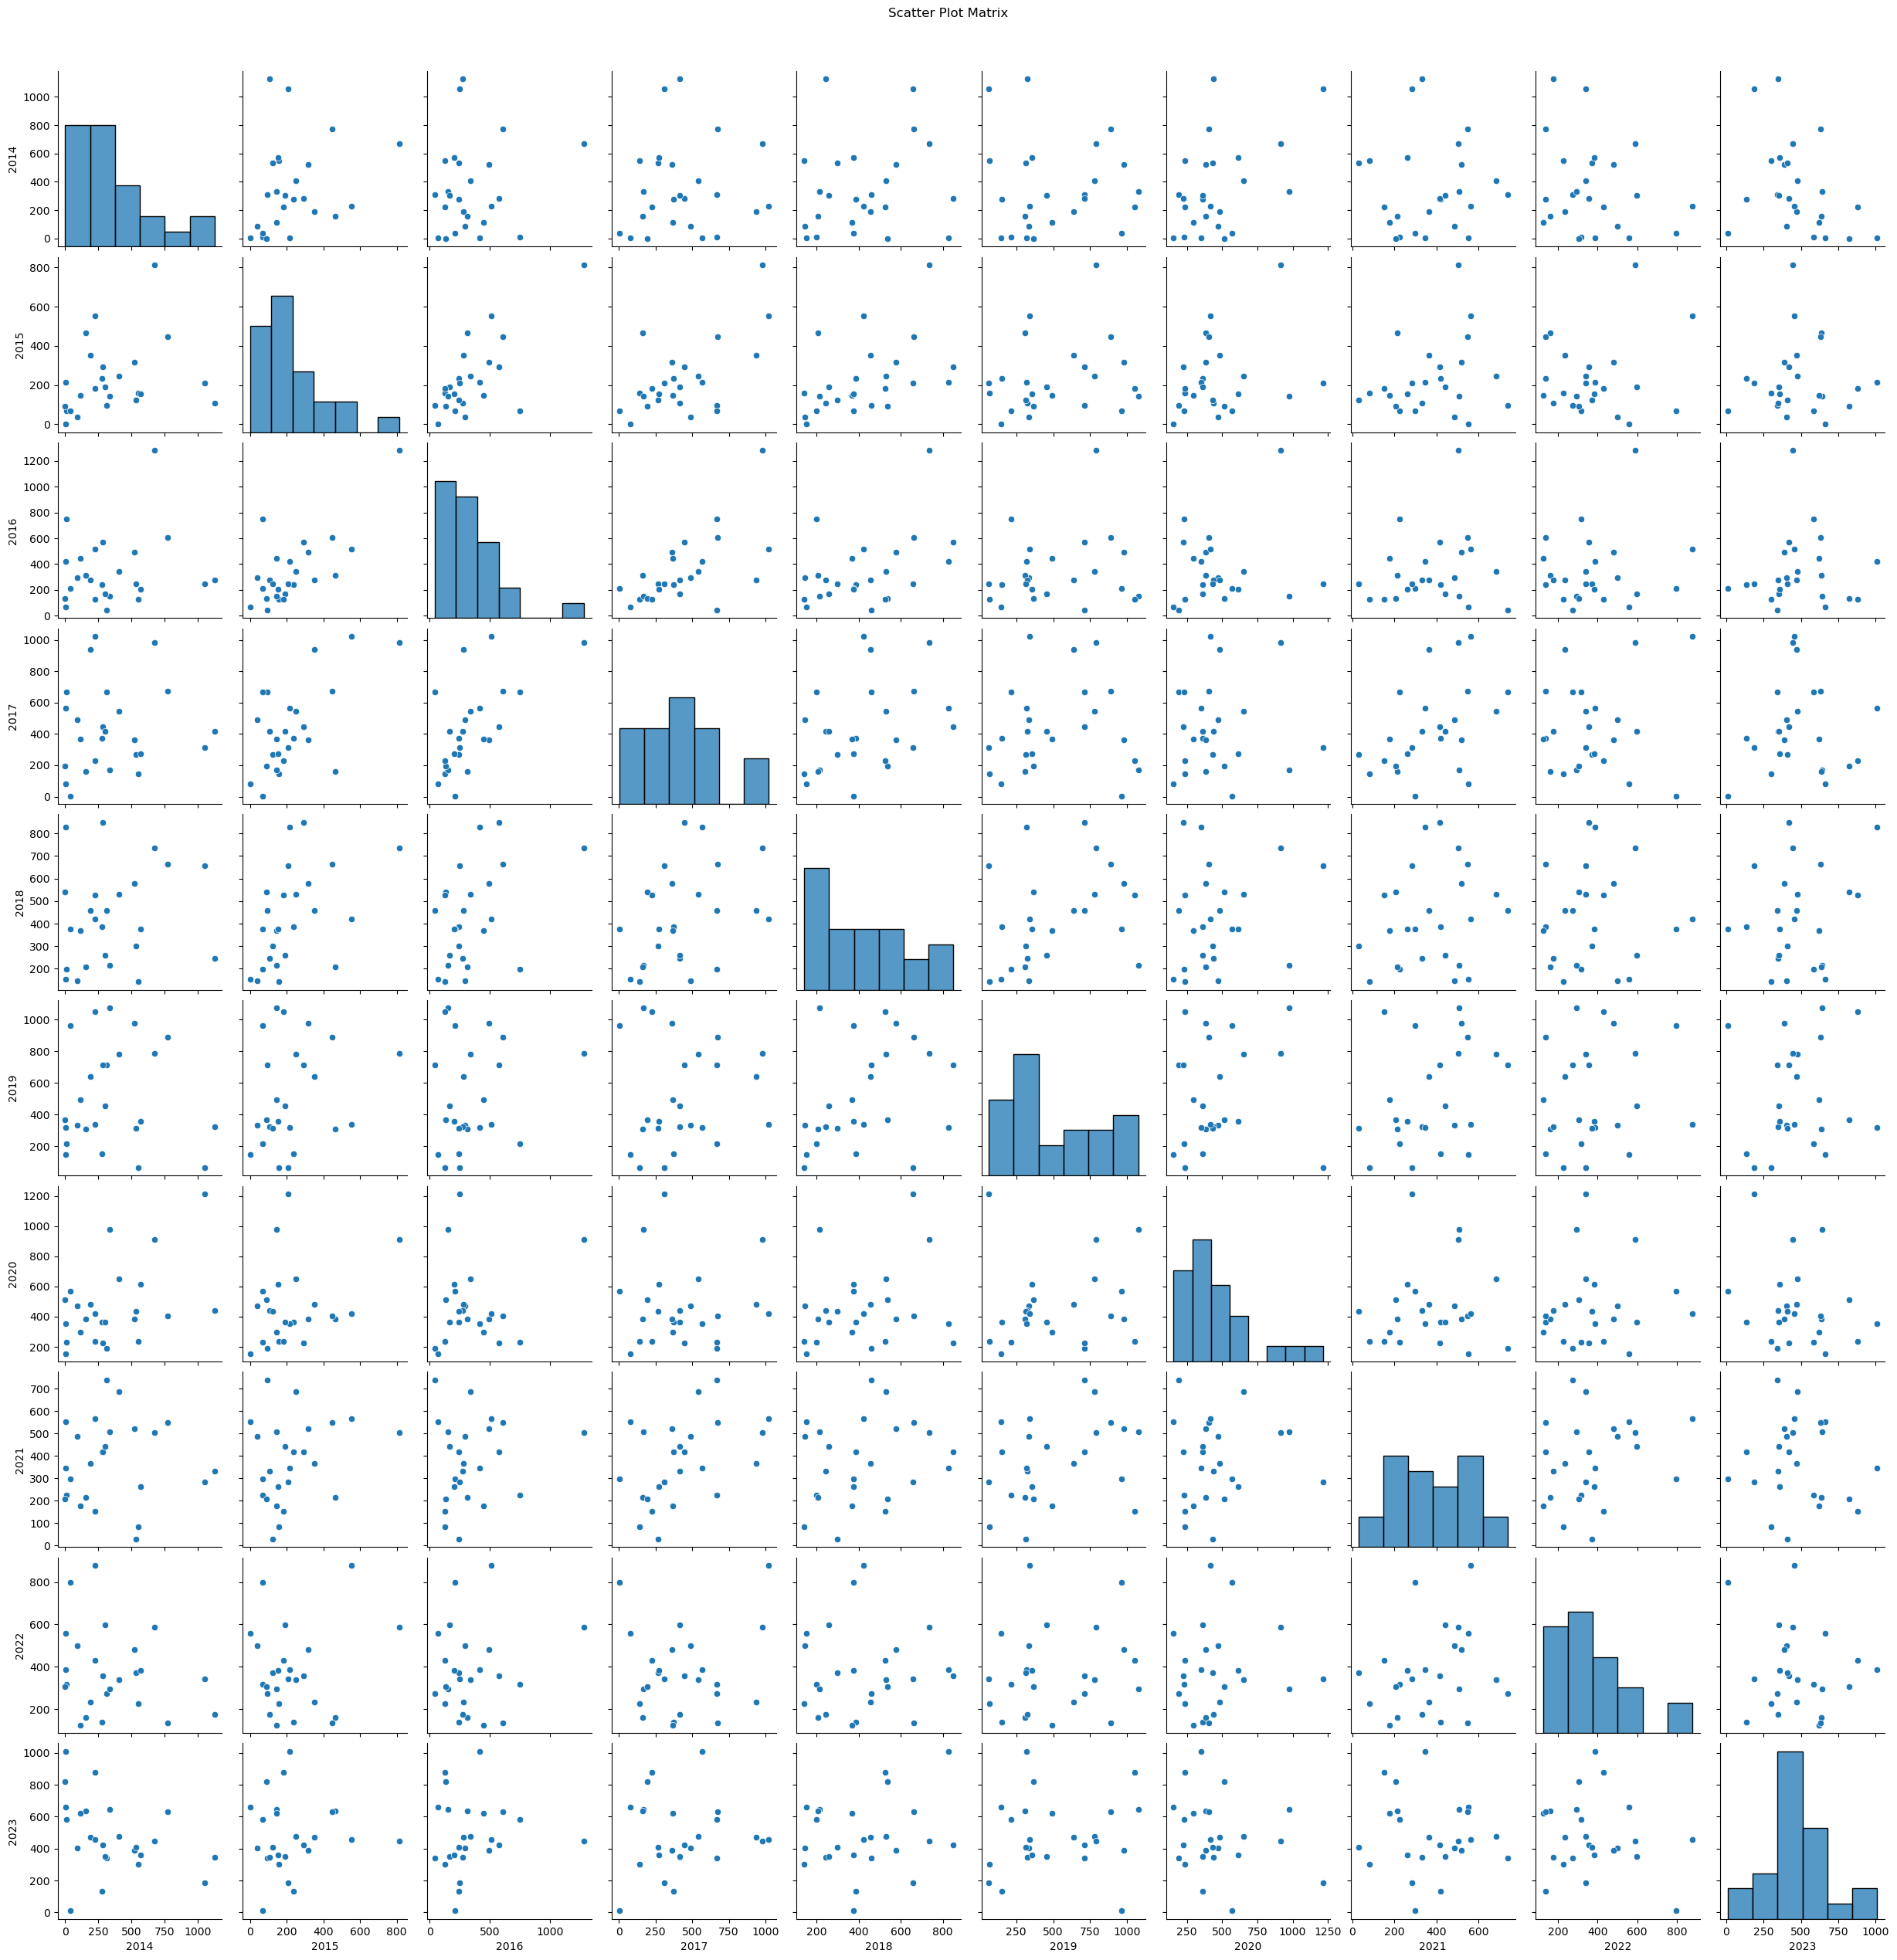

In [73]:
import seaborn as sns
# title : axes 객체(그래프)에 대한 개별 제목
# suptitle : figure 객체(전체 그래프)에 대한 제목
sns.pairplot(cctv)
plt.suptitle('Scatter Plot Matrix', y = 1.02)
plt.show()

# 히트맵

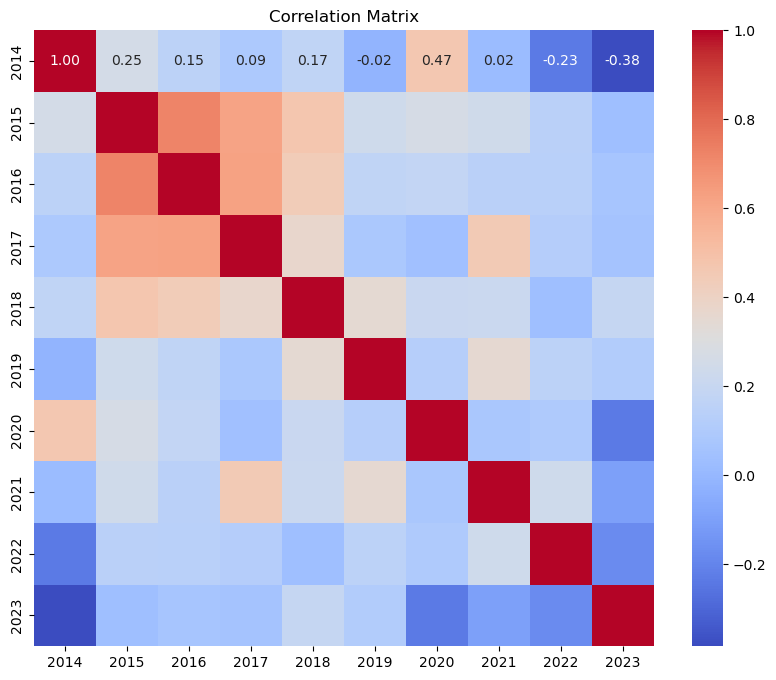

In [78]:
corr_matrix = cctv.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()